### IMPORTACIÓN DE PAQUETES

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

### IMPORTACIÓN DE DATA

In [3]:
data = pd.read_csv("/content/Indice.csv")

In [4]:
df = data.copy()

In [5]:
df.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

#### TRANSFORMANDO OBJETO A FECHAS

In [6]:
df.date  = pd.to_datetime(df.date, dayfirst = True)

#### CONFIGURACIÓN DE INDICE

In [7]:
df.set_index("date", inplace=True)

In [8]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### FRECEUNCIA

 **h: hora**

 **w: semanal**

 **d: diarios**

 **m: mensual**

 **a: anual**
 
 **b: bussines days**

In [10]:
df=df.asfreq('m')

In [11]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-31,481.61,2192.60,3491.83,20229.12
1994-02-28,467.14,2103.24,3328.10,19997.20
1994-03-31,445.77,2142.88,3086.40,19111.92
1994-04-30,NaN,NaN,NaN,NaN
1994-05-31,456.50,2137.34,2970.50,20973.59


In [12]:
df=df.asfreq('b')

In [13]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-31,481.61,2192.6,3491.83,20229.12
1994-02-01,NaN,NaN,NaN,NaN
1994-02-02,NaN,NaN,NaN,NaN
1994-02-03,NaN,NaN,NaN,NaN
1994-02-04,NaN,NaN,NaN,NaN


#### MANEJO DE DATOS PERDIDOS

In [14]:
df.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-31,False,False,False,False
1994-02-01,True,True,True,True
1994-02-02,True,True,True,True
1994-02-03,True,True,True,True
1994-02-04,True,True,True,True
...,...,...,...,...
2017-12-25,True,True,True,True
2017-12-26,True,True,True,True
2017-12-27,True,True,True,True


In [15]:
import missingno as msno

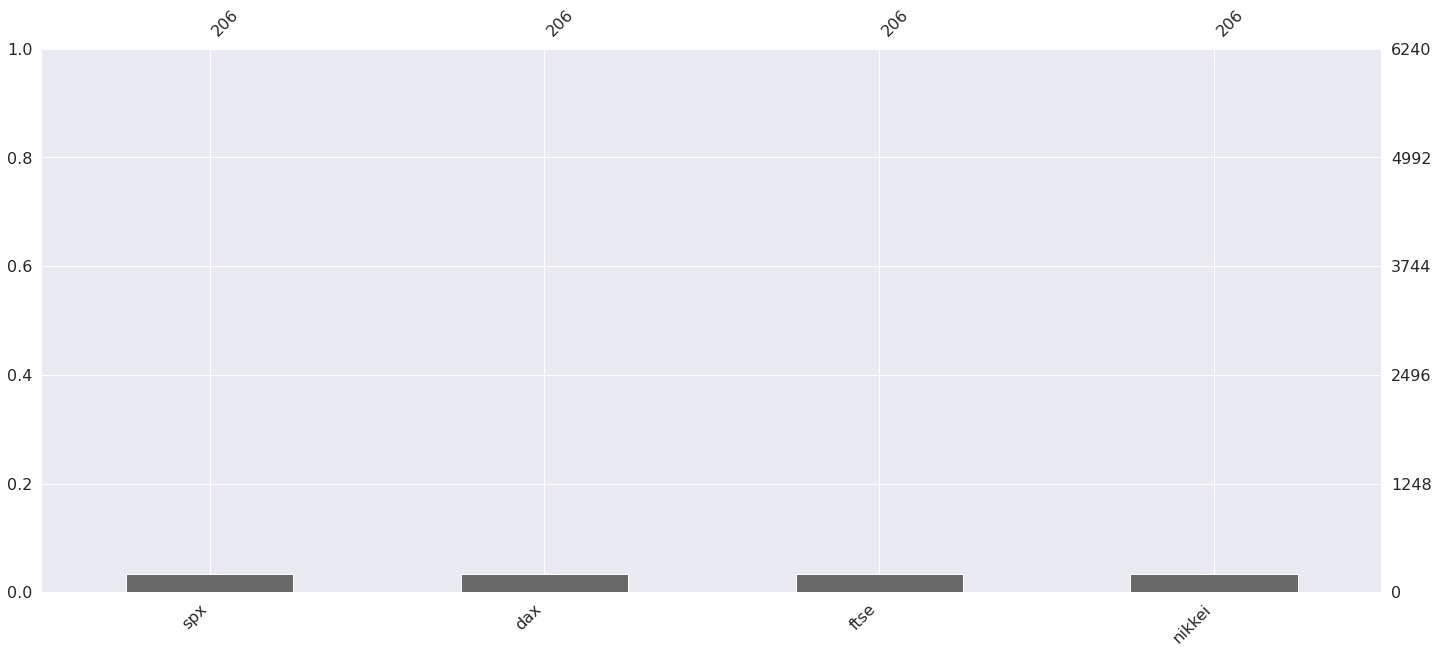

In [16]:
msno.bar(df)

Este gráfico de barras le da una idea de cuántos valores faltantes hay en cada columna. 

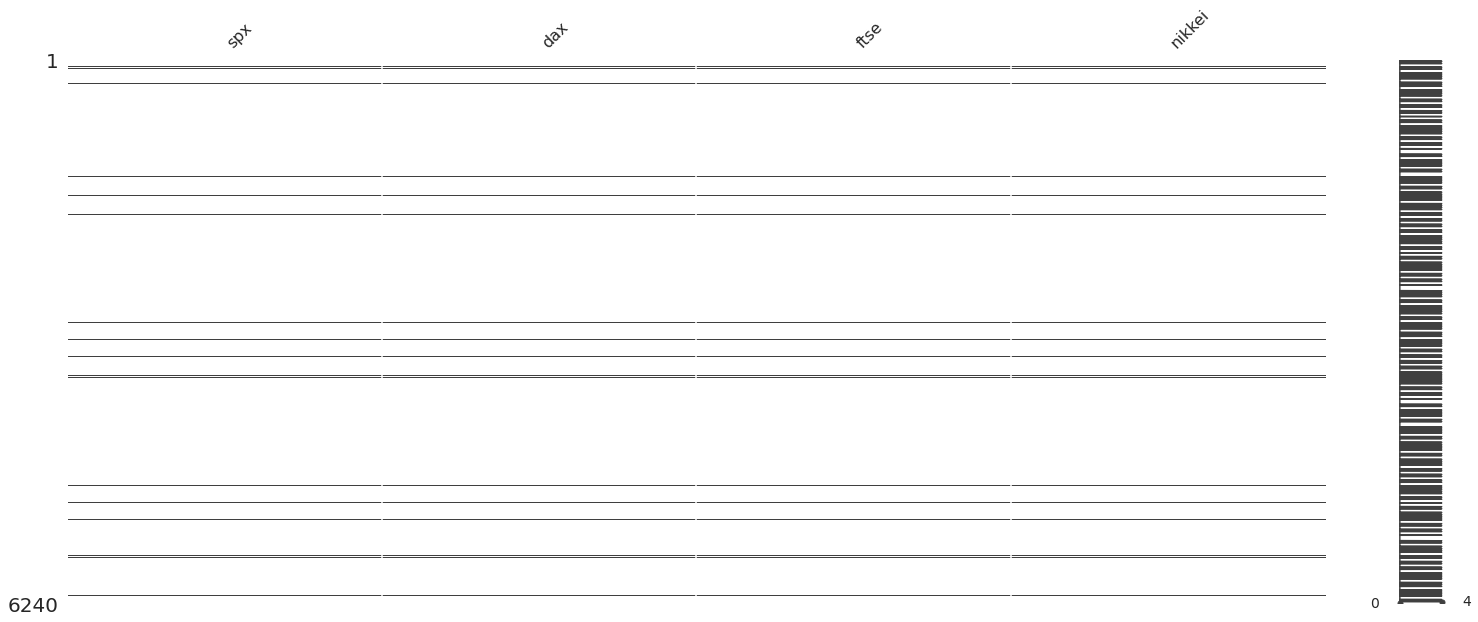

In [17]:
msno.matrix(df)

Con esta matriz, puede encontrar muy rápidamente el patrón de ausencia en el conjunto de datos. 

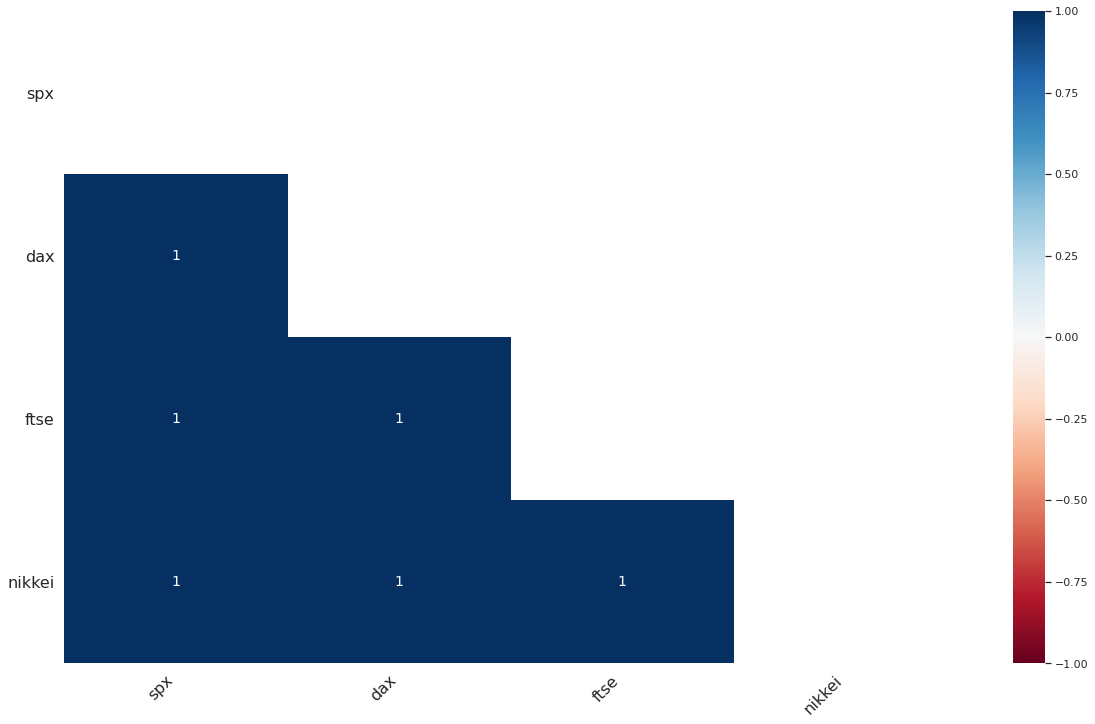

In [18]:
msno.heatmap(df)

##### CONTEO DATOS NA POR VARIABLES

In [19]:
df.isna().sum()

spx       6034
dax       6034
ftse      6034
nikkei    6034
dtype: int64

##### CORRECCIÓN DE DATOS NULOS

Método a utilizar para rellenar huecos en el relleno

pad/ffill de la serie reindexada: propague la última observación válida hacia el siguiente relleno 

backfill/bfill válido: utilice la siguiente observación válida para llenar el espacio 

In [22]:
df.spx=df.spx.fillna(method='ffill')
df.tail()

,spx,dax,ftse,nikkei
date,,,,
2017-12-25,2647.579927,13023.98,NaN,NaN
2017-12-26,2647.579927,13023.98,NaN,NaN
2017-12-27,2647.579927,13023.98,NaN,NaN
2017-12-28,2647.579927,13023.98,NaN,NaN
2017-12-29,2647.579927,13023.98,NaN,NaN


In [21]:
df.isna().sum()

spx       6034
dax          0
ftse      6034
nikkei    6034
dtype: int64

In [23]:
df.dax=df.dax.fillna(value = df.dax.mean())
df.tail()

,spx,dax,ftse,nikkei
date,,,,
2017-12-25,2647.579927,13023.98,NaN,NaN
2017-12-26,2647.579927,13023.98,NaN,NaN
2017-12-27,2647.579927,13023.98,NaN,NaN
2017-12-28,2647.579927,13023.98,NaN,NaN
2017-12-29,2647.579927,13023.98,NaN,NaN


In [24]:
df.ftse=df.ftse.fillna(method='ffill')
df.tail()

,spx,dax,ftse,nikkei
date,,,,
2017-12-25,2647.579927,13023.98,7326.666262,NaN
2017-12-26,2647.579927,13023.98,7326.666262,NaN
2017-12-27,2647.579927,13023.98,7326.666262,NaN
2017-12-28,2647.579927,13023.98,7326.666262,NaN
2017-12-29,2647.579927,13023.98,7326.666262,NaN


In [26]:
df.nikkei=df.nikkei.fillna(method='ffill')
df.tail()

,spx,dax,ftse,nikkei
date,,,,
2017-12-25,2647.579927,13023.98,7326.666262,22724.96
2017-12-26,2647.579927,13023.98,7326.666262,22724.96
2017-12-27,2647.579927,13023.98,7326.666262,22724.96
2017-12-28,2647.579927,13023.98,7326.666262,22724.96
2017-12-29,2647.579927,13023.98,7326.666262,22724.96


In [27]:
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### EXRACCIÓN DE VARIABLES 

In [28]:
df['market_value']=df.spx
df.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-31,481.61,2192.6,3491.83,20229.12,481.61
1994-02-01,481.61,2192.6,3491.83,19997.20,481.61
1994-02-02,481.61,2192.6,3491.83,19997.20,481.61
1994-02-03,481.61,2192.6,3491.83,19997.20,481.61
1994-02-04,481.61,2192.6,3491.83,19997.20,481.61


In [29]:
del df['spx']
del df['dax']
del df['ftse']
del df['nikkei']

In [30]:
df.describe()

,market_value
count,6240.000000
mean,1278.622920
std,475.506265
min,444.270000
25%,974.500896
50%,1239.940000
75%,1468.355174
max,2647.579927


### DIVISIÓN DE DATA

In [31]:
size = int(len(df)*0.8)

#### DATA DE ENTRENAMIENTO

In [32]:
df_trail = df.iloc[:size]
df_trail.head()

,market_value
date,
1994-01-31,481.61
1994-02-01,481.61
1994-02-02,481.61
1994-02-03,481.61
1994-02-04,481.61


#### DATA TEST

In [33]:
df_test = df.iloc[size:]
df.head()

,market_value
date,
1994-01-31,481.61
1994-02-01,481.61
1994-02-02,481.61
1994-02-03,481.61
1994-02-04,481.61
